In [1]:
# 패션 MNIST - 훈련세트, 테스트 세트
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
# 모델 생성 함수 - 층 추가 가능
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28))) # 입력층
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [3]:
# model = model_fn()
model = model_fn(keras.layers.Dropout(0.3)) # 30% 비율의 밀집층의 출력을 -으로 랜덤하게 변경
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
train_scaled = train_input / 255
test_scaled = test_input / 255

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(train_scaled, train_target, epochs=20, validation_data=(test_scaled, test_target))
# history 객체 - 정확도, 손실률에 대한 각 에포크별 측정 데이터
# 13 에포크 이후 과대 적합 - 13 에포크가 최적 지점
history = model.fit(train_scaled, train_target, epochs=13, validation_data=(test_scaled, test_target))

Epoch 1/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7385 - loss: 0.7398 - val_accuracy: 0.8362 - val_loss: 0.4479
Epoch 2/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8427 - loss: 0.4348 - val_accuracy: 0.8495 - val_loss: 0.4100
Epoch 3/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8579 - loss: 0.3933 - val_accuracy: 0.8647 - val_loss: 0.3833
Epoch 4/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8623 - loss: 0.3768 - val_accuracy: 0.8714 - val_loss: 0.3660
Epoch 5/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8673 - loss: 0.3659 - val_accuracy: 0.8659 - val_loss: 0.3645
Epoch 6/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8706 - loss: 0.3550 - val_accuracy: 0.8737 - val_loss: 0.3548
Epoch 7/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8753 - loss: 0.3436 - val_accuracy: 0.8707 - val_loss: 0.3542
Epoch 8/13
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8786 - loss: 0.3258 - 

In [5]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


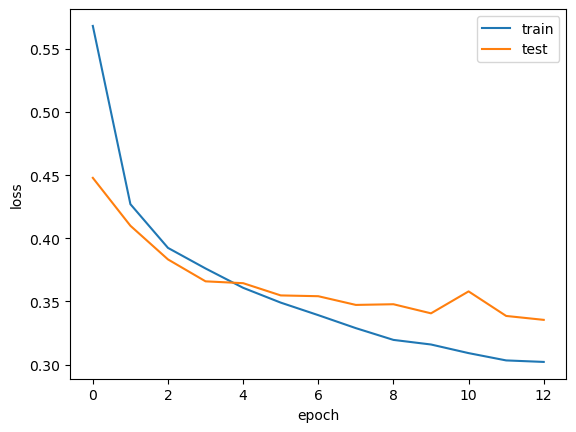

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) # 학습 세트 손실률 
plt.plot(history.history['val_loss']) # 테스트 세트 손실률 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

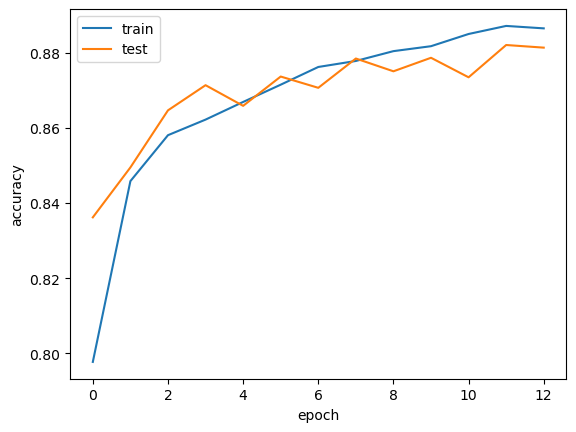

In [7]:
plt.plot(history.history['accuracy']) # 학습 세트 정확도 
plt.plot(history.history['val_accuracy']) # 테스트 세트 정확도 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [8]:
# 1. 가중치만 저장, 2. 모델 전체 저장
# model.save_weights("model.weights.h5")
#h5 - HDFS - 가중치만 저장, 저장해준 모델과 동일한 구성 후 로드

In [9]:
# model= model_fn(keras.layers.Dropout(0.3))

In [10]:
# model.load_weights("model.weights.h5") # 앞서 학습한 13 에포크 가중치를 로드

In [11]:
# predictions = model.predict(test_scaled)

In [12]:
# import numpy as np
# np.mean(test_target == predictions.argmax(axis=1)) # 접답은 1, 오답은 0

In [13]:
# 2. 모델 전체 저장
model.save("model-whole.keras")

In [16]:
# 저장된 모델 로드
model = keras.models.load_model("model-whole.keras")

In [17]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8825 - loss: 0.3328


[0.3354397118091583, 0.8813999891281128]

In [15]:
# np.mean(test_target == model.predict(test_scaled, test_target).argmax(axis=1))